In [1]:
from json import dumps, loads
from pathlib import Path

import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import scanpy as sc
from IPython.display import display



p_link = Path("/public/workspace/licanchengup/link")
p_test = p_link.joinpath("test")
p_disease = p_link.joinpath("disease")
p_disease_info = p_disease.joinpath("RA_info.json")

info = []
if p_disease_info.exists():
    info = loads(p_disease_info.read_text())
    
display(len(info))

p_root = p_disease.joinpath("dataset",Path(".").absolute().name,
                            "SDY998/ResultFiles/RNA_sequencing_result")
                           
print("cd {}".format(p_root.absolute()))

5

cd /public/workspace/licanchengup/link/disease/dataset/RA_AMP-Phase-1/SDY998/ResultFiles/RNA_sequencing_result


In [2]:
p_out = p_root.joinpath("celseq_matrix_ru1_molecules_processed.h5ad")
temp = pd.read_csv(p_out.with_name(p_out.name.replace(".h5ad","_ann.csv")))
display(temp.head(2),temp.shape)
temp["disease"].value_counts()

,Unnamed: 0,cell_name,barcode,batch,type,disease,plate,lane,quadrant,well384,annotations,t_SEN_x,t_SEN_y,CL
0,S006_L1Q1_A03,S006_L1Q1_A03,ACTCGA,301-0159,T cell,OA,S006,1,1,A03,SC-T1,8.720527,-9.586673,T cell
1,S006_L1Q1_A05,S006_L1Q1_A05,AGTGCA,301-0159,T cell,OA,S006,1,1,A05,SC-T4,11.419902,-12.422794,T cell


(5265, 14)

disease
RA    4601
OA     664
Name: count, dtype: int64

In [3]:
df_path = pd.DataFrame({"path": [i for i in p_root.iterdir() if i.match("*gz")]})
df_path["name"] = df_path["path"].apply(lambda x: x.name)
df_path

,path,name
0,/public/workspace/licanchengup/link/disease/da...,celseq_star_log.tsv.725582.gz
1,/public/workspace/licanchengup/link/disease/da...,celseq_molecule_counts.tsv.725592.gz
2,/public/workspace/licanchengup/link/disease/da...,celseq_meta.tsv.725591.gz
3,/public/workspace/licanchengup/link/disease/da...,celseq_matrix_ru10_reads.tsv.725590.gz
4,/public/workspace/licanchengup/link/disease/da...,celseq_matrix_ru1_molecules.tsv.725583.gz
5,/public/workspace/licanchengup/link/disease/da...,celseq_bad_barcodes.tsv.725588.gz
6,/public/workspace/licanchengup/link/disease/da...,celseq_flow.tsv.725589.gz
7,/public/workspace/licanchengup/link/disease/da...,celseq_molecule_counts.tsv.723951.gz
8,/public/workspace/licanchengup/link/disease/da...,celseq_flow_markers.tsv.725593.gz
9,/public/workspace/licanchengup/link/disease/da...,celseq_matrix_ru10_molecules.tsv.725585.gz


In [4]:
print(
    "\n".join(
        df_path[df_path["name"].apply(lambda x: "_molecules" in x)]["path"].astype(str)
    )
)

/public/workspace/licanchengup/link/disease/dataset/RA_AMP-Phase-1/SDY998/ResultFiles/RNA_sequencing_result/celseq_matrix_ru1_molecules.tsv.725583.gz
/public/workspace/licanchengup/link/disease/dataset/RA_AMP-Phase-1/SDY998/ResultFiles/RNA_sequencing_result/celseq_matrix_ru10_molecules.tsv.725585.gz


In [5]:
print(
    "\n".join(df_path[df_path["name"].apply(lambda x: "meta" in x)]["path"].astype(str))
)

/public/workspace/licanchengup/link/disease/dataset/RA_AMP-Phase-1/SDY998/ResultFiles/RNA_sequencing_result/celseq_meta.tsv.725591.gz
/public/workspace/licanchengup/link/disease/dataset/RA_AMP-Phase-1/SDY998/ResultFiles/RNA_sequencing_result/celseq_meta_unfiltered.tsv.725587.gz


In [6]:
p_out = p_root.joinpath("celseq_matrix_ru1.h5ad")
if not p_out.exists():
    df = pd.read_csv(
        "SDY998/ResultFiles/RNA_sequencing_result/celseq_matrix_ru1_molecules.tsv.725583.gz",
        sep="\t",
    )
    df.fillna(0, inplace=True)
    df.index = df["gene"].to_numpy()
    df.drop(columns="gene", inplace=True)
    df = df.transpose()
    print(df.shape)
    adata = sc.AnnData(df)
    del df
    display(adata)
    df_meta = pd.read_csv(
        "SDY998/ResultFiles/RNA_sequencing_result/celseq_meta.tsv.725591.gz", sep="\t"
    )
    print(df_meta.shape)
    print("index is unique : %s" % str(df_meta["cell_name"].is_unique))
    df_meta.index = df_meta["cell_name"].to_numpy()
    display(df_meta.head())

    adata.obs = adata.obs.join(df_meta)  # 以index进行拼接
    display(adata.obs.head())
    adata.write_h5ad(p_out)
    del df_meta, adata
adata = sc.read_h5ad(p_out)
adata

AnnData object with n_obs × n_vars = 10099 × 38355
    obs: 'cell_name', 'barcode', 'sample', 'type', 'disease', 'plate', 'lane', 'quadrant', 'well384', 'picard_pf_bases', 'picard_pf_aligned_bases', 'picard_ribosomal_bases', 'picard_coding_bases', 'picard_utr_bases', 'picard_intronic_bases', 'picard_intergenic_bases', 'picard_pct_ribosomal_bases', 'picard_pct_coding_bases', 'picard_pct_utr_bases', 'picard_pct_intronic_bases', 'picard_pct_intergenic_bases', 'picard_pct_mrna_bases', 'picard_pct_usable_bases', 'reads_ru1', 'molecules_ru1', 'genes_detected_ru1', 'genes_detected_reads_ru1', 'percent_mt_molecules_ru1', 'percent_mt_reads_ru1', 'reads', 'molecules', 'genes_detected', 'percent_mt_molecules', 'percent_top10'

In [7]:
# 从网页获取的metadata
df_meta = pd.DataFrame(
    loads(Path("./SCP279/metadata/t-SNE coordinates RA.json").read_text())["data"]
)
df_meta.index = df_meta["cells"].to_numpy()
print(df_meta.shape)
df_meta.head()

(5265, 4)


,annotations,cells,x,y
S006_L1Q1_A03,SC-T1,S006_L1Q1_A03,8.720527,-9.586673
S006_L1Q1_A05,SC-T4,S006_L1Q1_A05,11.419902,-12.422794
S006_L1Q1_A07,SC-T1,S006_L1Q1_A07,-1.143772,-14.887437
S006_L1Q1_A09,SC-T1,S006_L1Q1_A09,8.810839,-10.073524
S006_L1Q1_A11,SC-T4,S006_L1Q1_A11,-0.058576,-17.304506


In [8]:
adata = adata[adata.obs["cell_name"].isin(df_meta.index), :]
adata.obs = adata.obs.join(df_meta).loc[
    :,
    "cell_name,barcode,sample,type,disease,plate,lane,quadrant,well384,annotations,x,y".split(
        ","
    ),
]
adata.obs = adata.obs.rename(columns={"x": "t_SEN_x", "y": "t_SEN_y"})
display(adata)
display(adata.obs.head())

adata.obs["CL"] = (
    adata.obs["annotations"]
    .str.extract("SC-(\\w)\\d", expand=False)
    .map({"M": "macrophage", "F": "fibroblast", "B": "B cell", "T": "T cell"})
)

display(adata.obs["CL"].value_counts())

AnnData object with n_obs × n_vars = 5265 × 38355
    obs: 'cell_name', 'barcode', 'sample', 'type', 'disease', 'plate', 'lane', 'quadrant', 'well384', 'annotations', 't_SEN_x', 't_SEN_y'

,cell_name,barcode,sample,type,disease,plate,lane,quadrant,well384,annotations,t_SEN_x,t_SEN_y
S006_L1Q1_A03,S006_L1Q1_A03,ACTCGA,301-0159,T cell,OA,S006,1,1,A03,SC-T1,8.720527,-9.586673
S006_L1Q1_A05,S006_L1Q1_A05,AGTGCA,301-0159,T cell,OA,S006,1,1,A05,SC-T4,11.419902,-12.422794
S006_L1Q1_A07,S006_L1Q1_A07,GTACAG,301-0159,T cell,OA,S006,1,1,A07,SC-T1,-1.143772,-14.887437
S006_L1Q1_A09,S006_L1Q1_A09,ACGTAC,301-0159,T cell,OA,S006,1,1,A09,SC-T1,8.810839,-10.073524
S006_L1Q1_A11,S006_L1Q1_A11,CTTCGA,301-0159,T cell,OA,S006,1,1,A11,SC-T4,-0.058576,-17.304506


CL
fibroblast    1844
T cell        1529
B cell        1142
macrophage     750
Name: count, dtype: int64

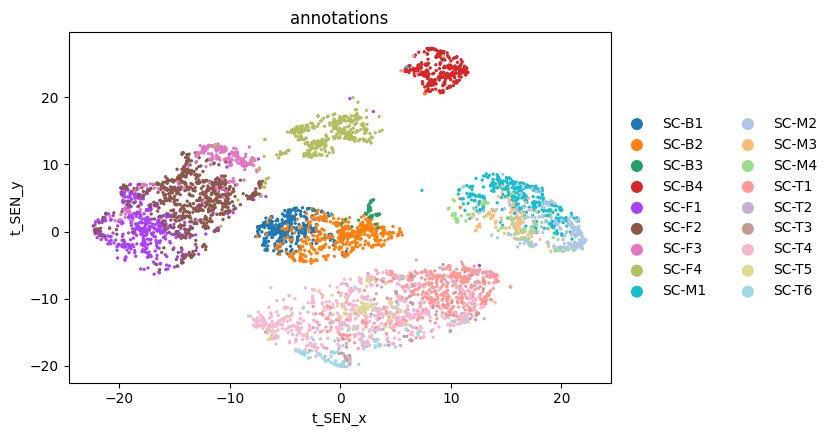

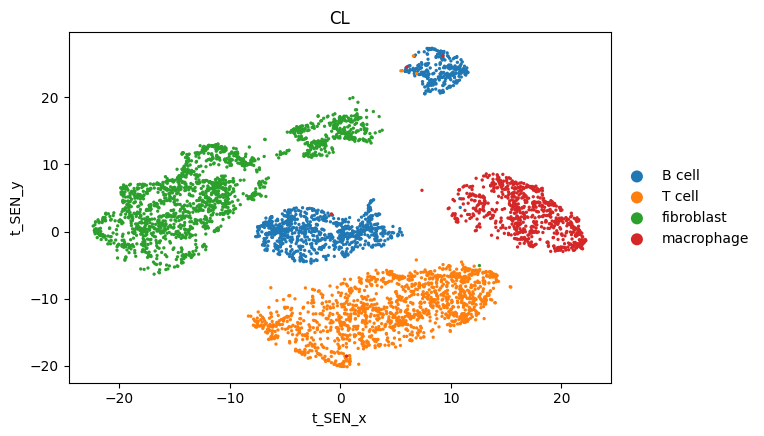

In [9]:
sc.pl.scatter(adata, "t_SEN_x", "t_SEN_y", color="annotations")
sc.pl.scatter(adata, "t_SEN_x", "t_SEN_y", color="CL")

## adata.obs

In [10]:
display(adata.obs.head())
adata.obs["CL"].value_counts()

,cell_name,barcode,sample,type,disease,plate,lane,quadrant,well384,annotations,t_SEN_x,t_SEN_y,CL
S006_L1Q1_A03,S006_L1Q1_A03,ACTCGA,301-0159,T cell,OA,S006,1,1,A03,SC-T1,8.720527,-9.586673,T cell
S006_L1Q1_A05,S006_L1Q1_A05,AGTGCA,301-0159,T cell,OA,S006,1,1,A05,SC-T4,11.419902,-12.422794,T cell
S006_L1Q1_A07,S006_L1Q1_A07,GTACAG,301-0159,T cell,OA,S006,1,1,A07,SC-T1,-1.143772,-14.887437,T cell
S006_L1Q1_A09,S006_L1Q1_A09,ACGTAC,301-0159,T cell,OA,S006,1,1,A09,SC-T1,8.810839,-10.073524,T cell
S006_L1Q1_A11,S006_L1Q1_A11,CTTCGA,301-0159,T cell,OA,S006,1,1,A11,SC-T4,-0.058576,-17.304506,T cell


CL
fibroblast    1844
T cell        1529
B cell        1142
macrophage     750
Name: count, dtype: int64

In [11]:
p_out = p_root.joinpath("celseq_matrix_ru1_molecules_processed.h5ad")
display(type(adata.X))
adata.X = csr_matrix(adata.X)
display(type(adata.X))
adata.write_h5ad(p_out)
adata.obs.to_csv(p_out.with_name(p_out.name.replace(".h5ad", "_ann.csv")), index=True)

numpy.ndarray

scipy.sparse._csr.csr_matrix

In [12]:
p_out = p_root.joinpath("celseq_matrix_ru1_molecules_processed.h5ad")
display(type(adata.X))
adata.X = csr_matrix(adata.X)
display(type(adata.X))
adata.write_h5ad(p_out)
adata.obs.to_csv(p_out.with_name(p_out.name.replace(".h5ad", "_ann.csv")), index=True)

scipy.sparse._csr.csr_matrix

scipy.sparse._csr.csr_matrix

In [13]:
# info_item = {
#     "name": "AMP-Phase-1",
#     "species": "human",
#     "disease": "RA",
#     "tissue":"Synovial tissue",
#     "h5ad": str(p_out.absolute().relative_to(p_disease)),
#     "ann": str(
#         p_out.with_name(p_out.name.replace(".h5ad", "_ann.csv"))
#         .absolute()
#         .relative_to(p_disease)
#     ),
#     "note": "RA,OA;FCM sorting",
# }

# if info_item not in info:
#     info.append(info_item)
#     print("append")

# p_disease_info.write_text(dumps(info))

# print("\nfinish\n".center(100,"-"))

In [15]:
import sys
sys.path.append(str(p_test))

In [18]:
from func import h5ad_to_mtx
h5ad_to_mtx(adata,'RA_AMP-Phase-1_count')

frist 10 data.X nonzero elements:
 [[1 1 1 1 1 1 1 1 1 1]]
[out] RA_AMP-Phase-1_count
